# Crime and Policing Expenditures Exploratory Questions


*Jiechen Li*


In this exercise we'll be examining the relationship between crime and policing expenditures using county-level data from Massachusetts. In particular, we're hoping to answer the question "Is there a substantial relationship between crime and policing expenditures?"

## Exercises

### Exercise 1

Begin by downloading the data for this exercise from https://github.com/nickeubank/MIDS_Data/blob/master/descriptive_exercise/crime_expend_MA.csv (just go to `github.com/nickeubank/MIDS_Data`, then go to `descriptive_exercise` and get `crime_expend_MA.csv` if you don't want to type all that).


In [13]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

pd.set_option("mode.copy_on_write", True)

crime_expend_data = pd.read_csv(
    "https://github.com/nickeubank/MIDS_Data/raw/master/descriptive_exercise/crime_expend_MA.csv"
)
crime_expend_data.sample(5)

,months,county_code,crimeindex,policeexpenditures,month,year
229,17,5,51.181989,27.678403,6,1991
653,50,12,29.267606,37.519636,3,1994
1322,101,6,30.510045,70.086870,6,1998
1086,83,4,86.410300,72.051300,12,1996
1025,78,8,96.425415,52.406649,7,1996


### Exercise 2

This data includes monthly data on both each county's policing expenditures (`policeexpenditures` as share of county budget) and an index of crime (`crimeindex`, scaled 0-100) from 1990 to late 2001. 

In these exercises, we'll be focusing on just two counties -- `county_code` 4 and 10. 

First, for each of these two counties, calculate the mean expenditure level and mean crimeindex score (i.e. calculate both means separately for each county). 

Just to make sure we're practicing applied skills—use a loop to calculate your means and print your results nicely! So you should get output like this (though obviously with different numbers—I'm not gonna give you the answer!):

```
for county 4, average policing expenditure is 23.7 and average crime index is 75.83
for county 10, average policing expenditure is 62.15 and average crime index is 55.88
```

In [14]:
# calculate two means for county 4 and 10

filter_data = crime_expend_data[crime_expend_data["county_code"].isin([4, 10])]

county_codes = [4, 10]

for county in county_codes:
    county_data = filter_data[filter_data["county_code"] == county]

    mean_expenditure = county_data["policeexpenditures"].mean()
    mean_crimeindex = county_data["crimeindex"].mean()

    print(
        f"For county {county},\n"
        f"average policing expenditure is {mean_expenditure:.2f},\n"
        f"and average crime index is {mean_crimeindex:.2f}"
    )

For county 4,
average policing expenditure is 54.26,
and average crime index is 47.83
For county 10,
average policing expenditure is 54.24,
and average crime index is 47.77


### Exercise 3

Now calculate the standard deviation of both expenditures and crime for these two counties.

In [15]:
# calculate two standard deviations

county_codes = [4, 10]

for county in county_codes:
    county_data = filter_data[filter_data["county_code"] == county]

    std_expenditure = county_data["policeexpenditures"].std()
    std_crimeindex = county_data["crimeindex"].std()

    print(
        f"For county {county}, standard deviation of\n"
        f"policing expenditure is {std_expenditure:.2f},\n"
        f"and standard deviation of crime index is {std_crimeindex:.2f}"
    )

For county 4, standard deviation of
policing expenditure is 16.77,
and standard deviation of crime index is 26.94
For county 10, standard deviation of
policing expenditure is 16.68,
and standard deviation of crime index is 27.00


### Exercise 4

Now calculate the correlation between `policeexpenditures` and `crimeindex` for both of these counties (again, output the correlations with nicely formatted and labelled statements!)

In [16]:
# calculate correlation

county_codes = [4, 10]

for county in county_codes:
    county_data = filter_data[filter_data["county_code"] == county]

    correlation = county_data["policeexpenditures"].corr(county_data["crimeindex"])

    print(
        f"For county {county}, the correlation between\n"
        f"policing expenditures and crime index is {correlation:.2f}"
    )

For county 4, the correlation between
policing expenditures and crime index is -0.06
For county 10, the correlation between
policing expenditures and crime index is -0.06


### Exercise 5

Based on your results up to this point, what would you guess about whether policing reduces crime? (I know -- this is just a descriptive statistics, and correlation does not imply causality. But what would you infer if this was all you knew?

>Based on the mean, standard deviation and correlation values, it seems that the counties have a similar profile with crime and policing expenditures. The weak negative correlation (-0.06) for both 4 and 10 counties suggests a very weak linear relationship and a very slight tendency that an increase in policing expenditures could be associated with a decrease in crime index. In other words, I don't think increase policing expenditures will decrese the crime in these counties because of the nagtive correlation.

### Exercise 6

Given what you've seen up till now, would you infer that county 4 and county 10 have a similar relationship between crime and police expenditures?

>Given these similarities, it would be reasonable to infer that county 4 and county 10 have a similar relationship between crime and police expenditures. Both counties show a very slight tendency for crime to decrease as police expenditures increase, but the relationship is so weak that it's not a strong indicator.

### Exercise 7

Now plot histograms of `policeexpenditures` for both county 4 and county 10. Do the results change you impression of the similarity of county 4 and county 10?

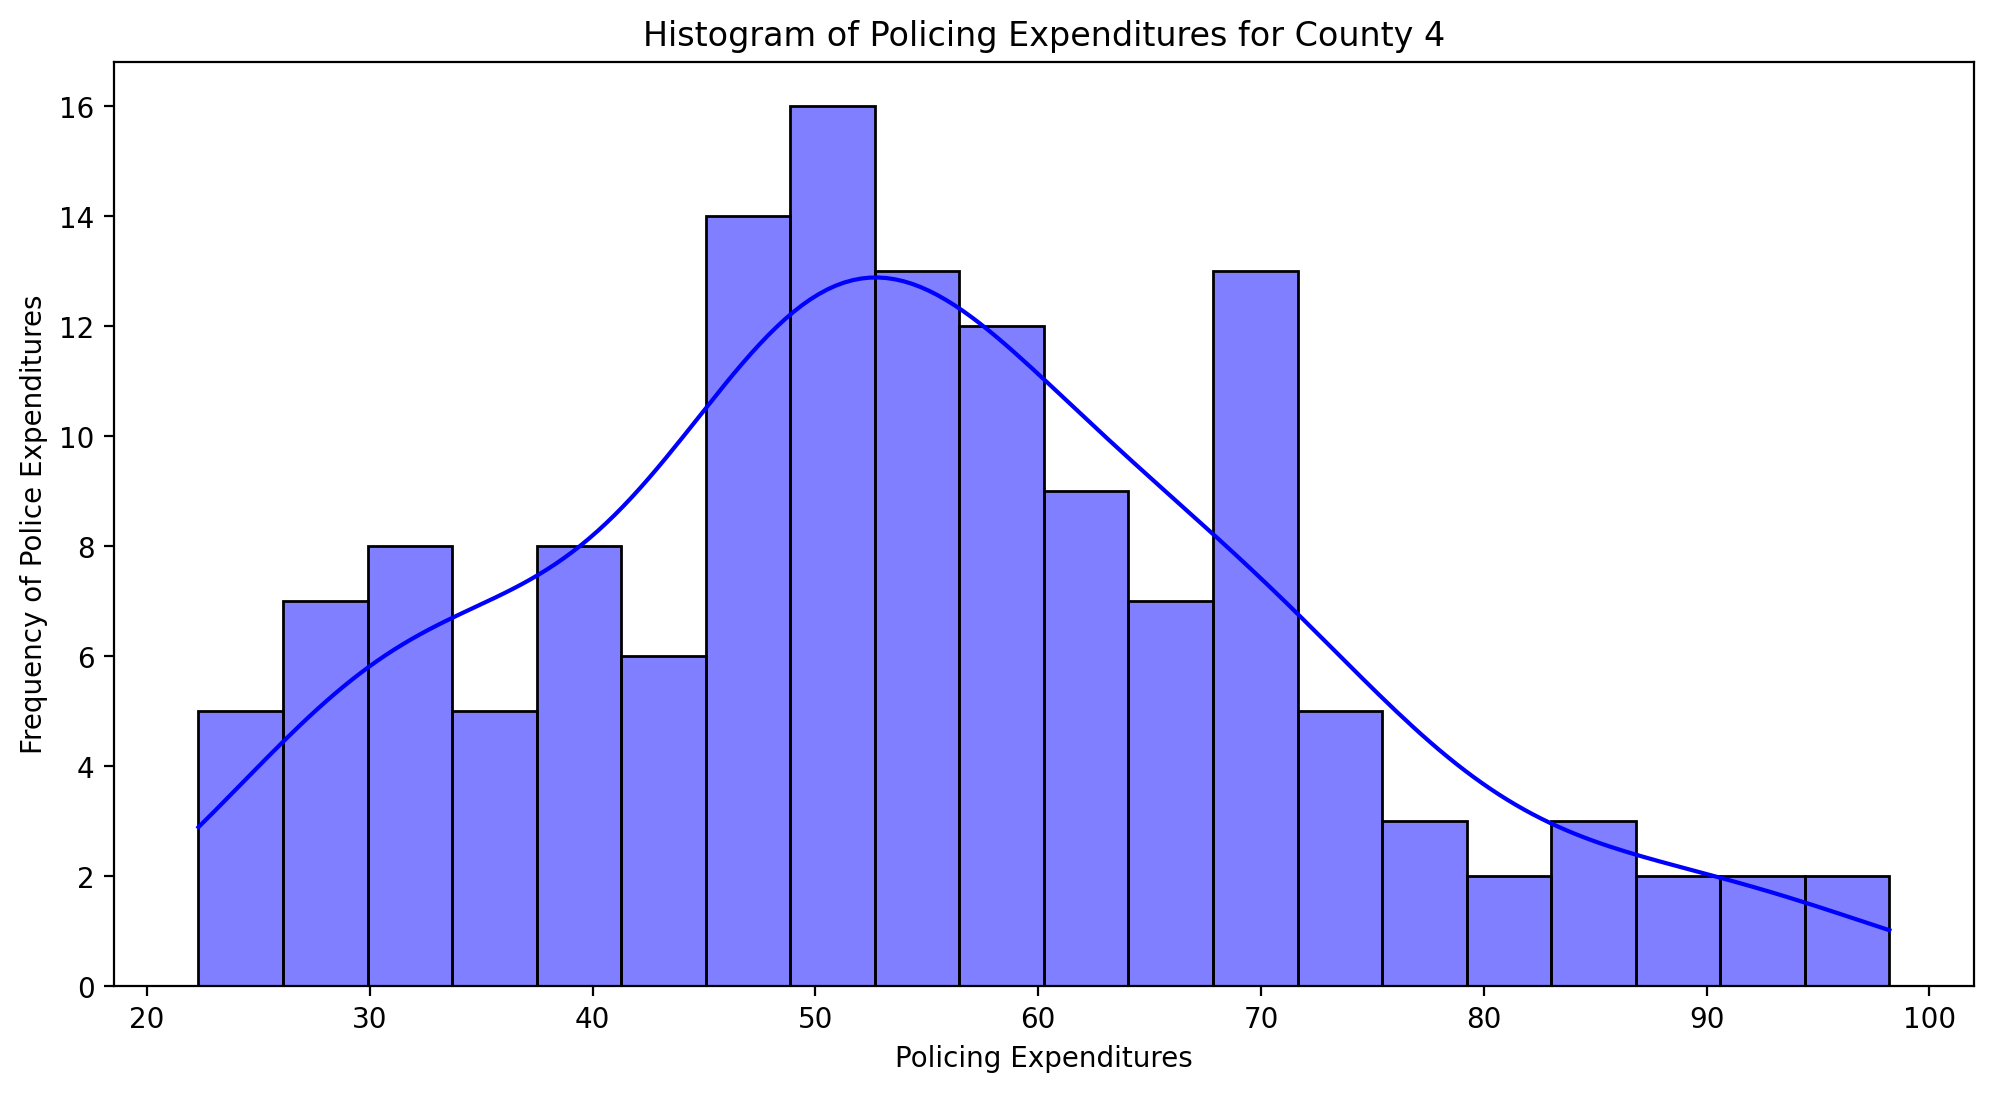

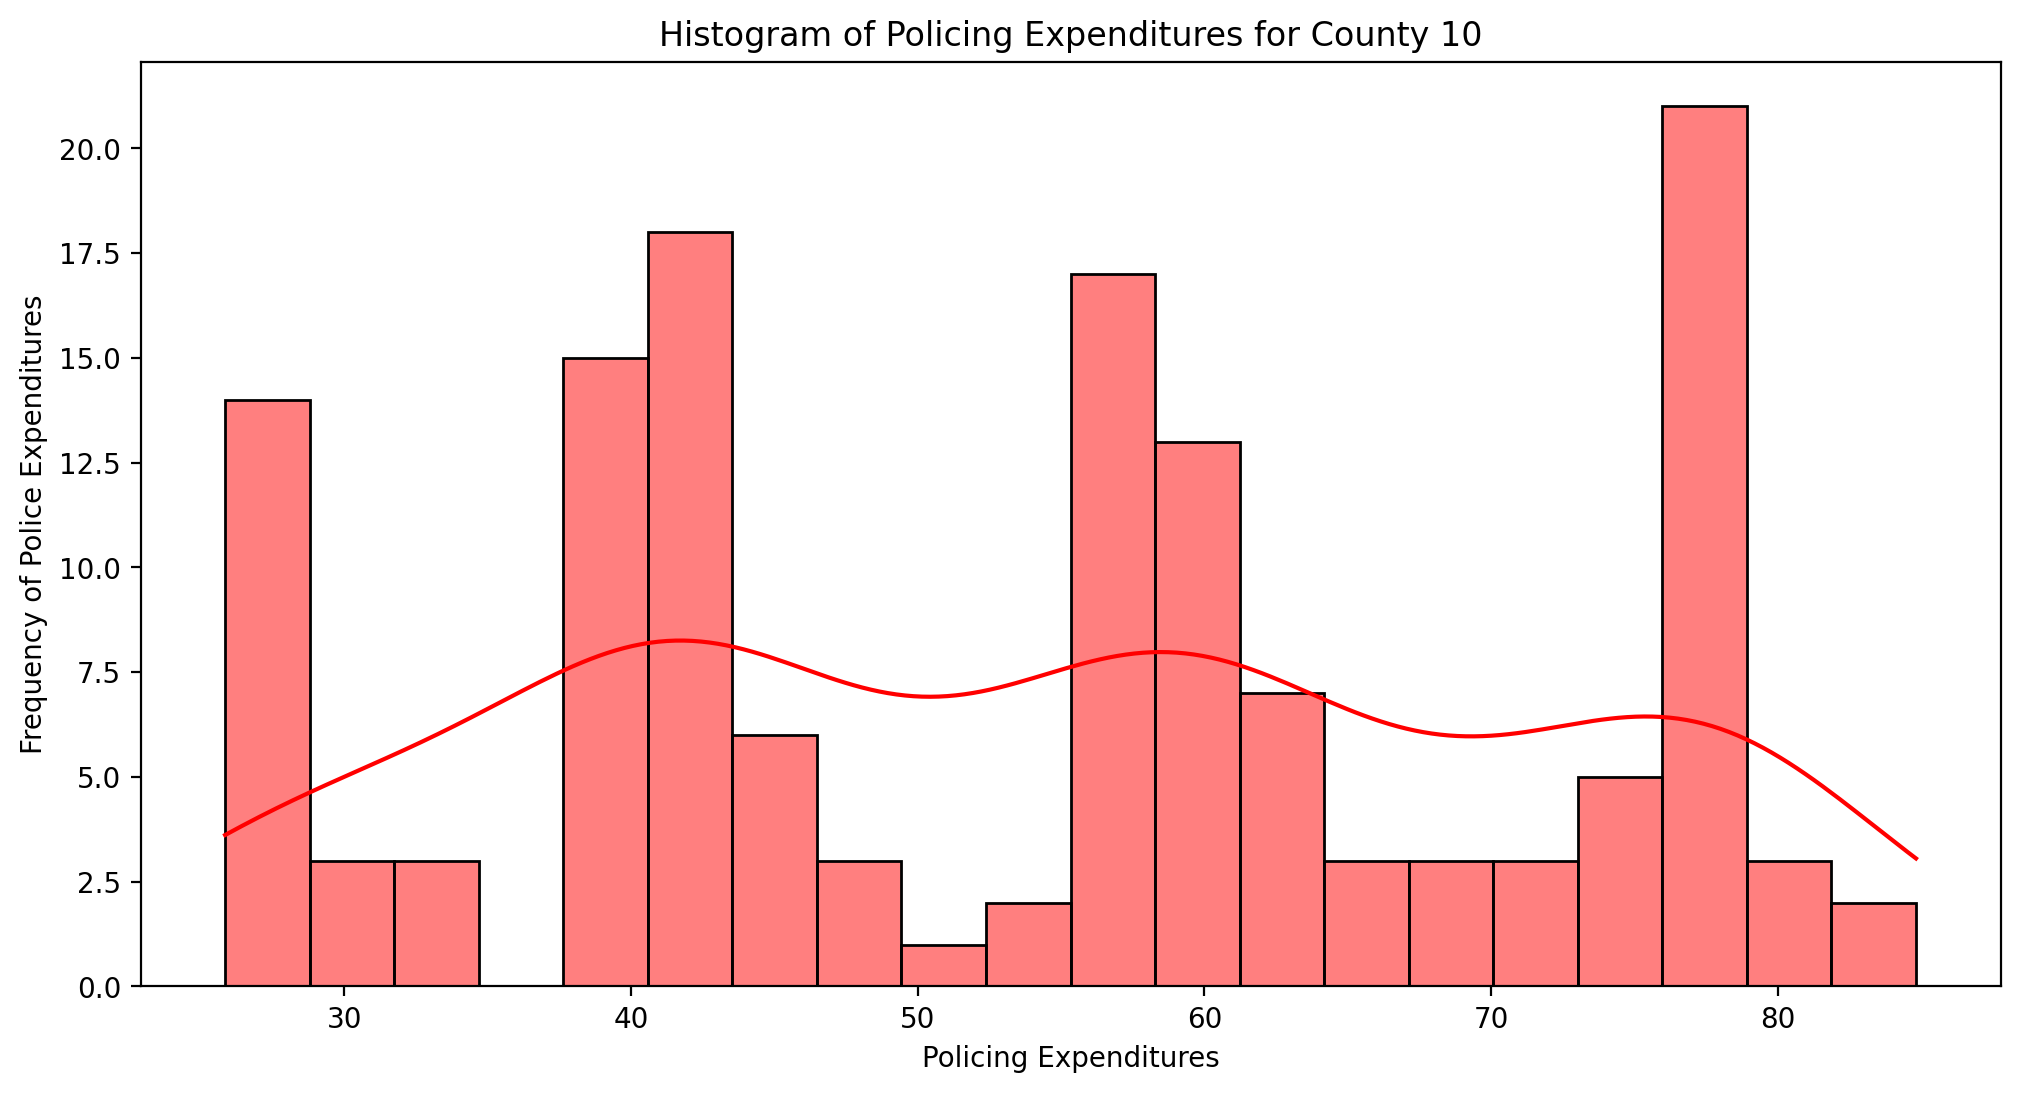

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# plot for County 4
plt.figure(figsize=(12, 6))
sns.histplot(
    data=filter_data[filter_data["county_code"] == 4],
    x="policeexpenditures",
    color="blue",
    kde=True,
    bins=20,
)
plt.title("Histogram of Policing Expenditures for County 4")
plt.xlabel("Policing Expenditures")
plt.ylabel("Frequency of Police Expenditures")
plt.show()

# plot for County 10
plt.figure(figsize=(12, 6))
sns.histplot(
    data=filter_data[filter_data["county_code"] == 10],
    x="policeexpenditures",
    color="red",
    kde=True,
    bins=20,
)
plt.title("Histogram of Policing Expenditures for County 10")
plt.xlabel("Policing Expenditures")
plt.ylabel("Frequency of Police Expenditures")
plt.show()

>The results change my initial impression. Before the plotting, I concluded from the code results that the relationship between policing expenditures and crime index for both county 4 and 10 could be the same. Because they share the same correlation rate -0.06. However, from the plotting results, I can tell the County 4 shows the relatively normal distribution in policing expenditures while the County 10 shows uneven distribution with very high expenditures and no expenditure at all. In this case, the same correlation rate cannot be the only factor to secure the result of relationship between policing expenditures and crime index for both county 4 and 10.

### Exercise 8

Finally, create a scatter plot of the relationship between crime and police expenditures for each county (e.g. crime on one axis, police expenditures on the other). Does this change your sense of how similar these are?

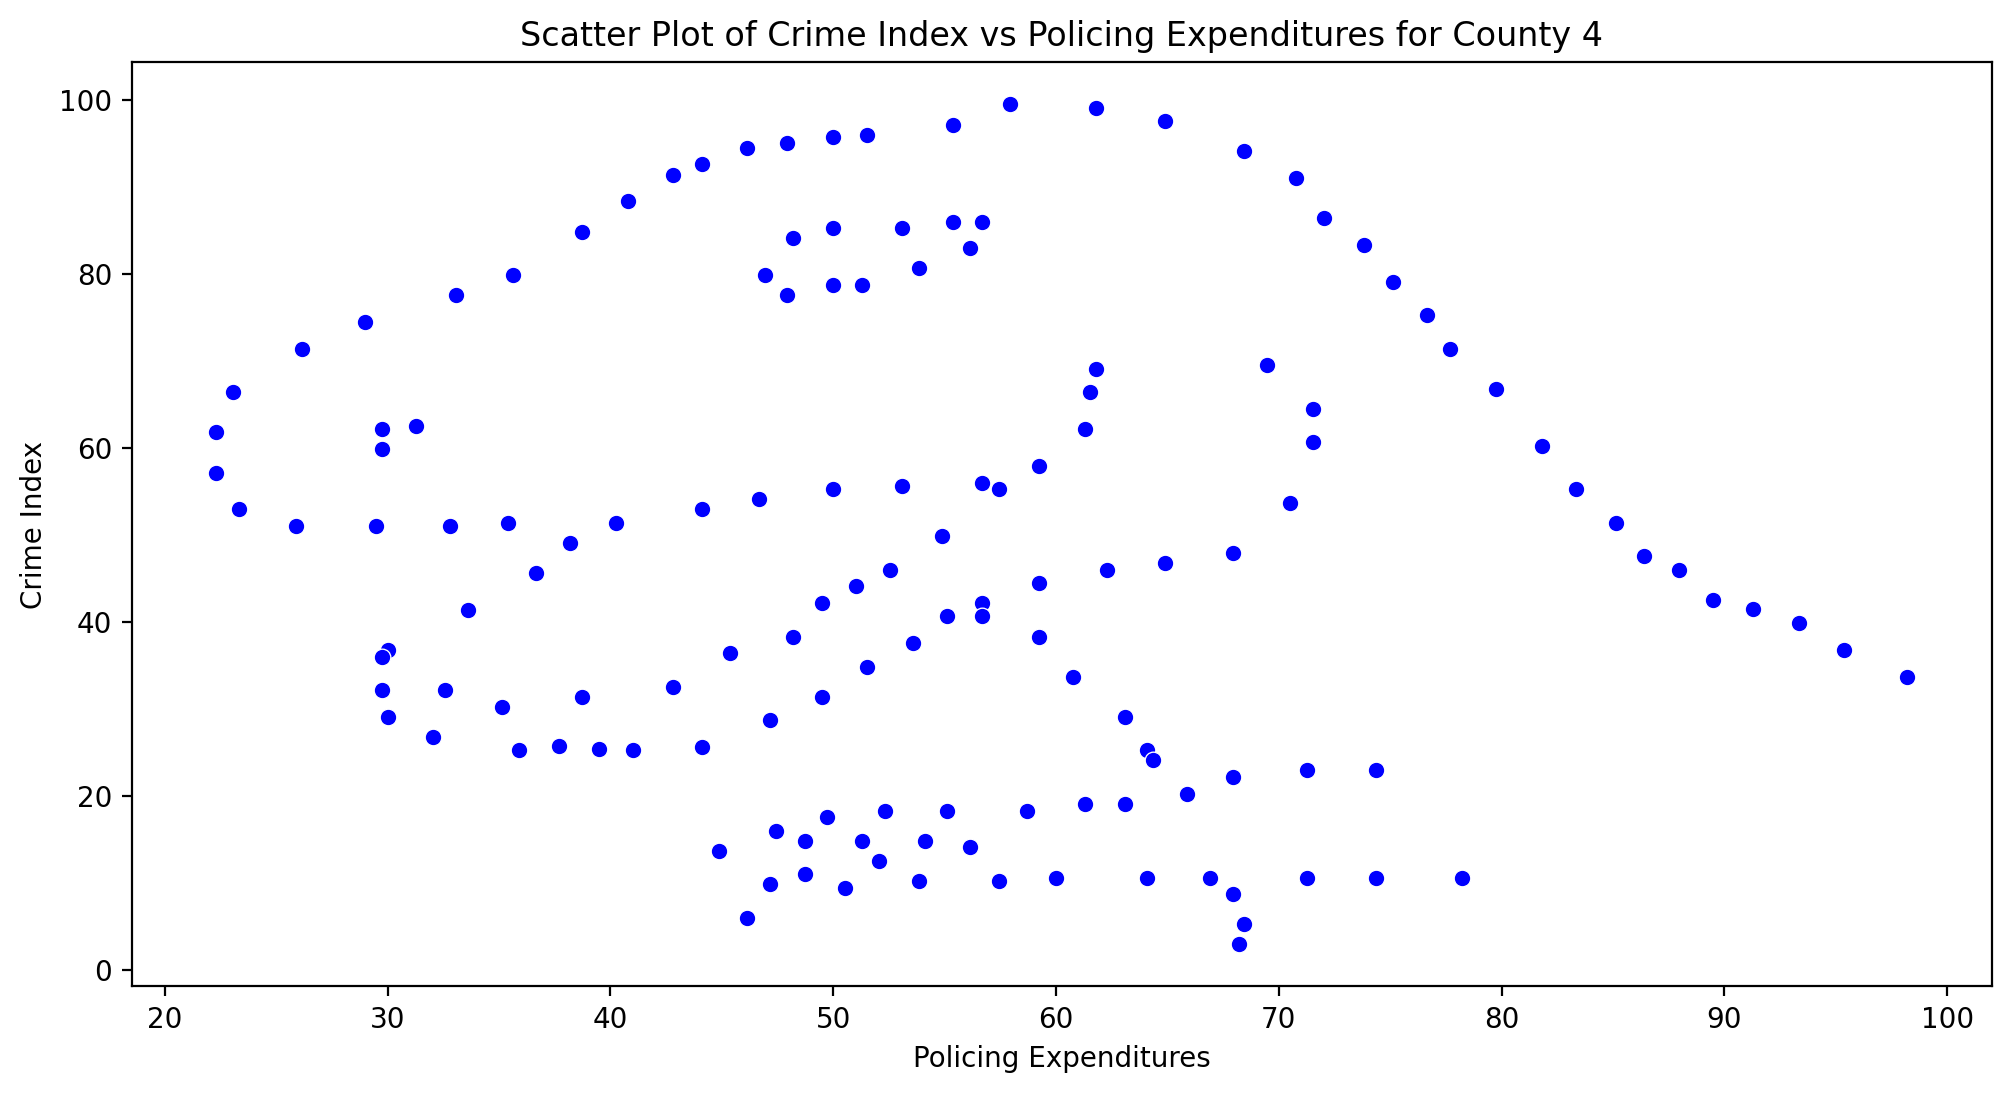

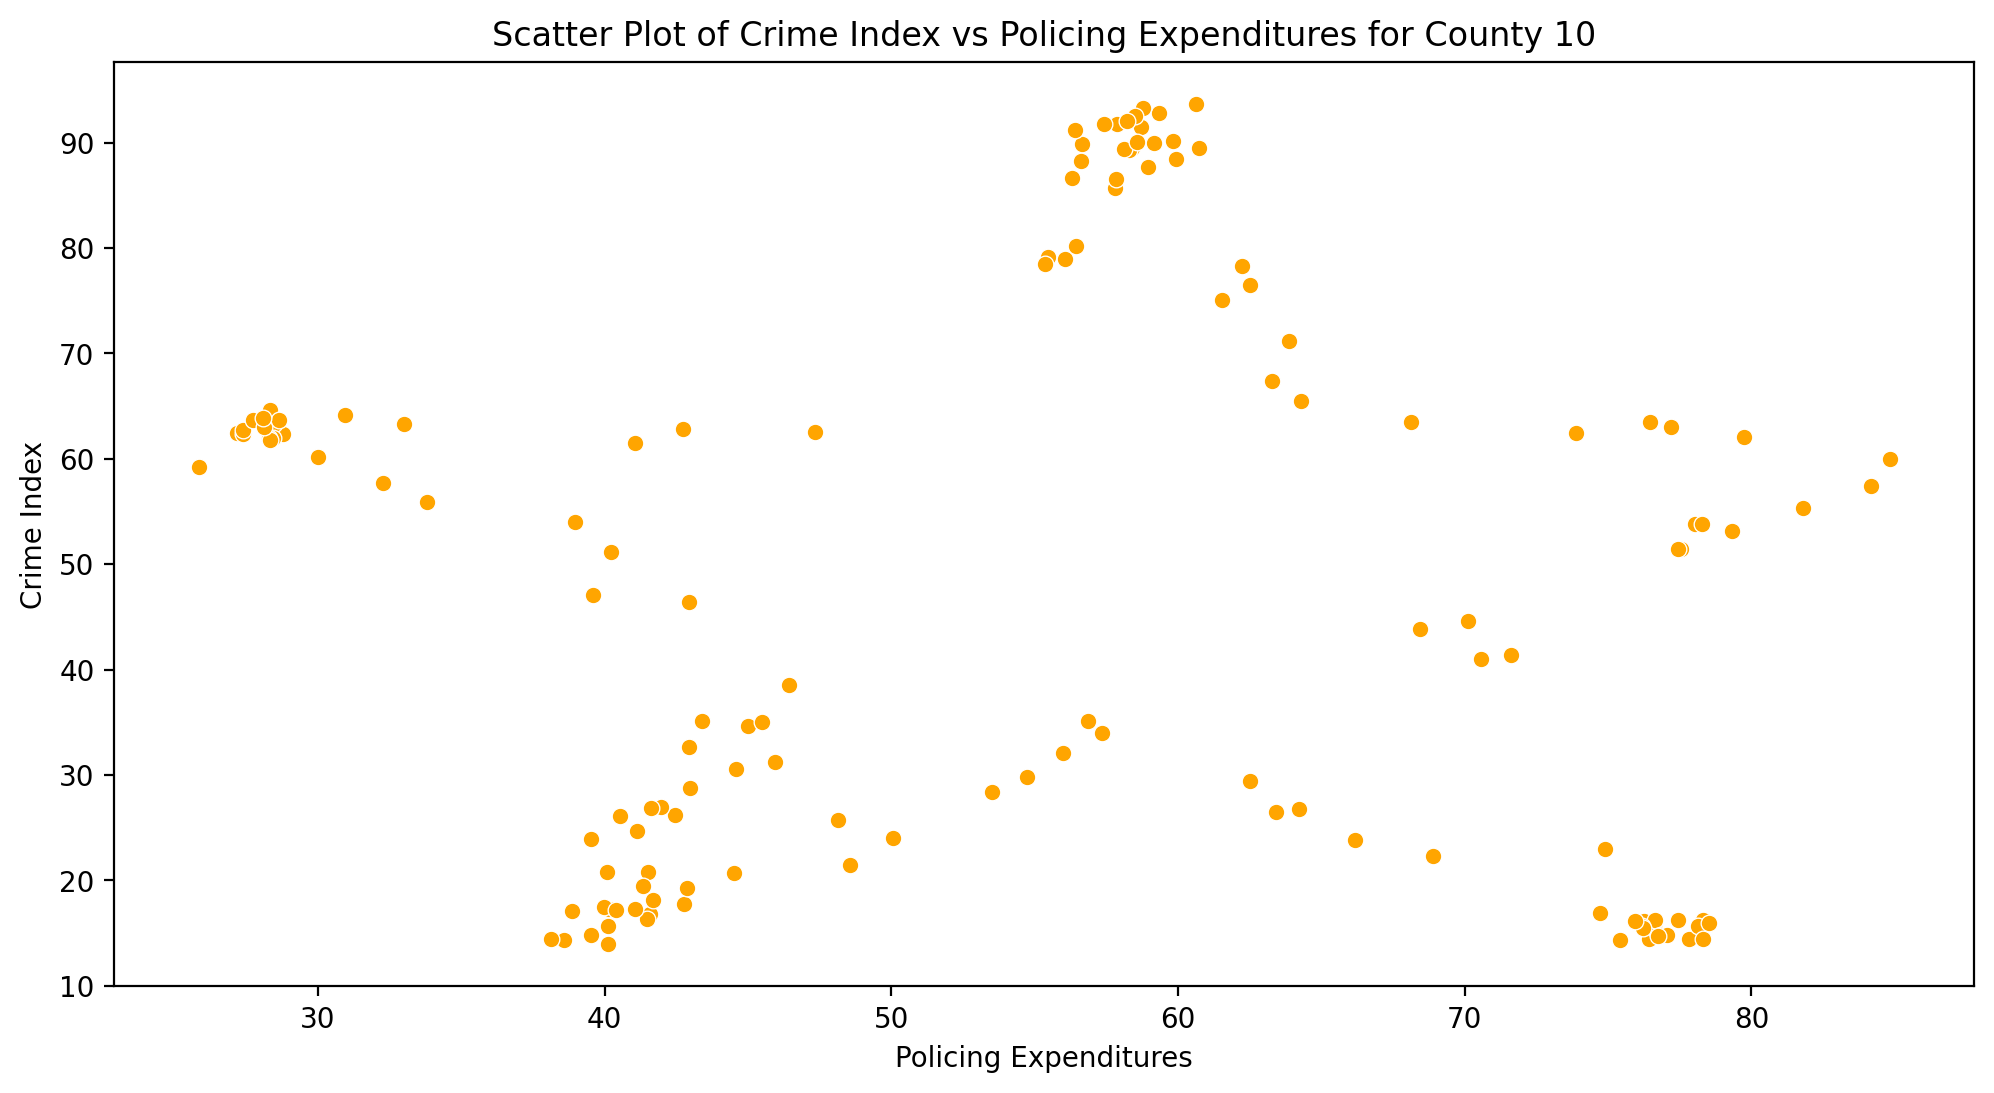

In [18]:
# scatter plot for county 4
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=filter_data[filter_data["county_code"] == 4],
    x="policeexpenditures",
    y="crimeindex",
    color="blue",
)
plt.title("Scatter Plot of Crime Index vs Policing Expenditures for County 4")
plt.xlabel("Policing Expenditures")
plt.ylabel("Crime Index")
plt.show()

# scatter plot for county 10
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=filter_data[filter_data["county_code"] == 10],
    x="policeexpenditures",
    y="crimeindex",
    color="orange",
)
plt.title("Scatter Plot of Crime Index vs Policing Expenditures for County 10")
plt.xlabel("Policing Expenditures")
plt.ylabel("Crime Index")
plt.show()

>The dinosaur-shaped scatterplot of the County 4 and the star-shaped scatterplot of the County 10 indicates the relationship between policing expenditures and crime index are different despite they share the same corralation rate.

## After you have answered...

Read this [discussion page](discussion_exploratory.ipynb).


Write a loop that plots the relationship between `policeexpenditures` and crimeindex for all 13 counties in the dataset separately!

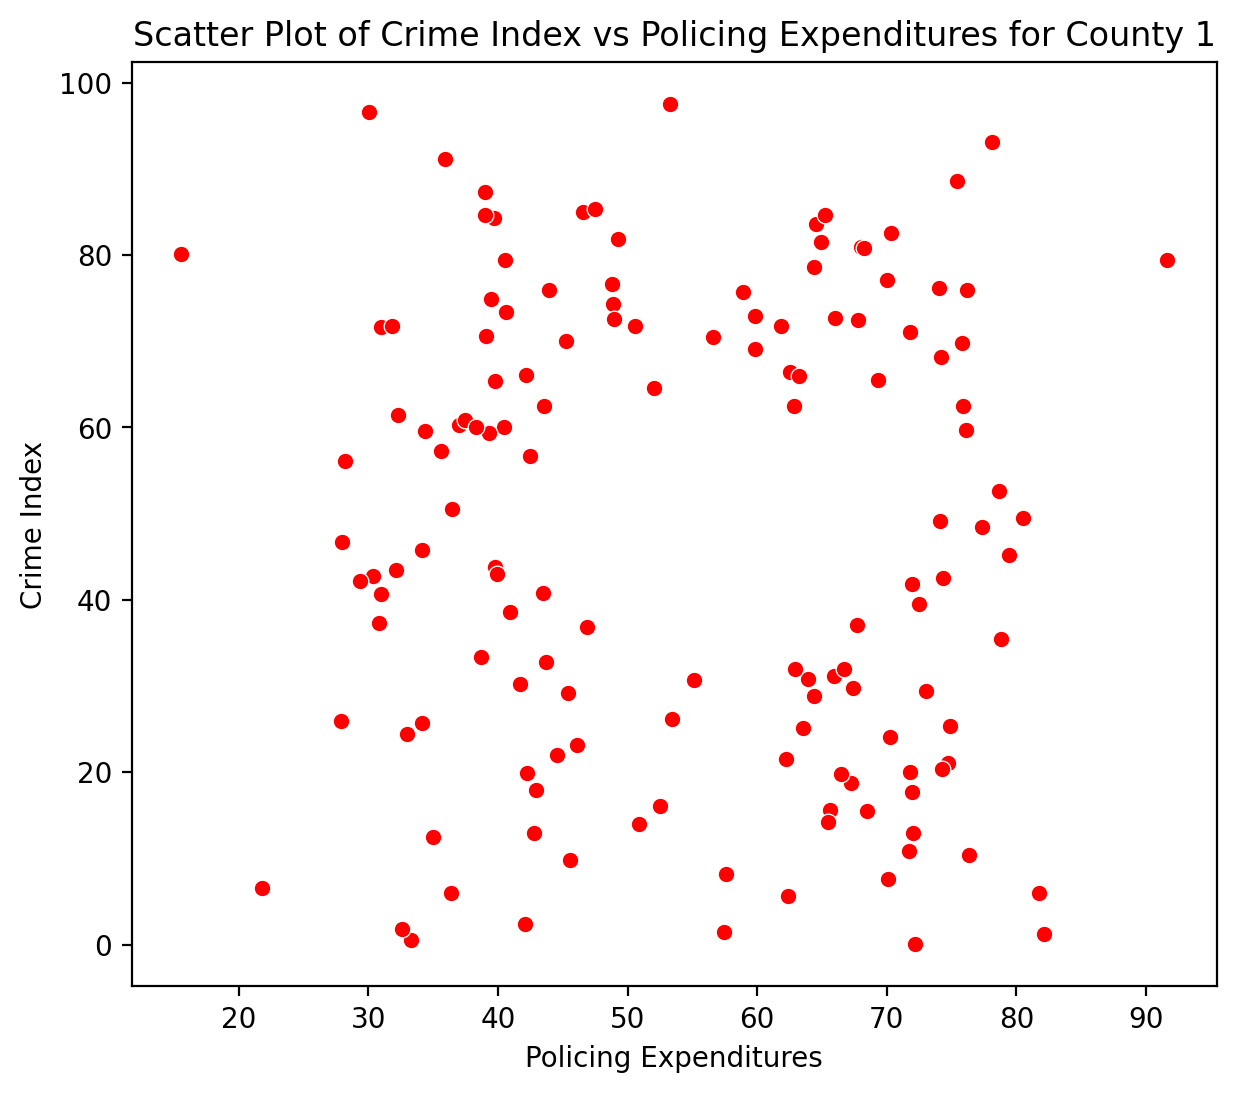

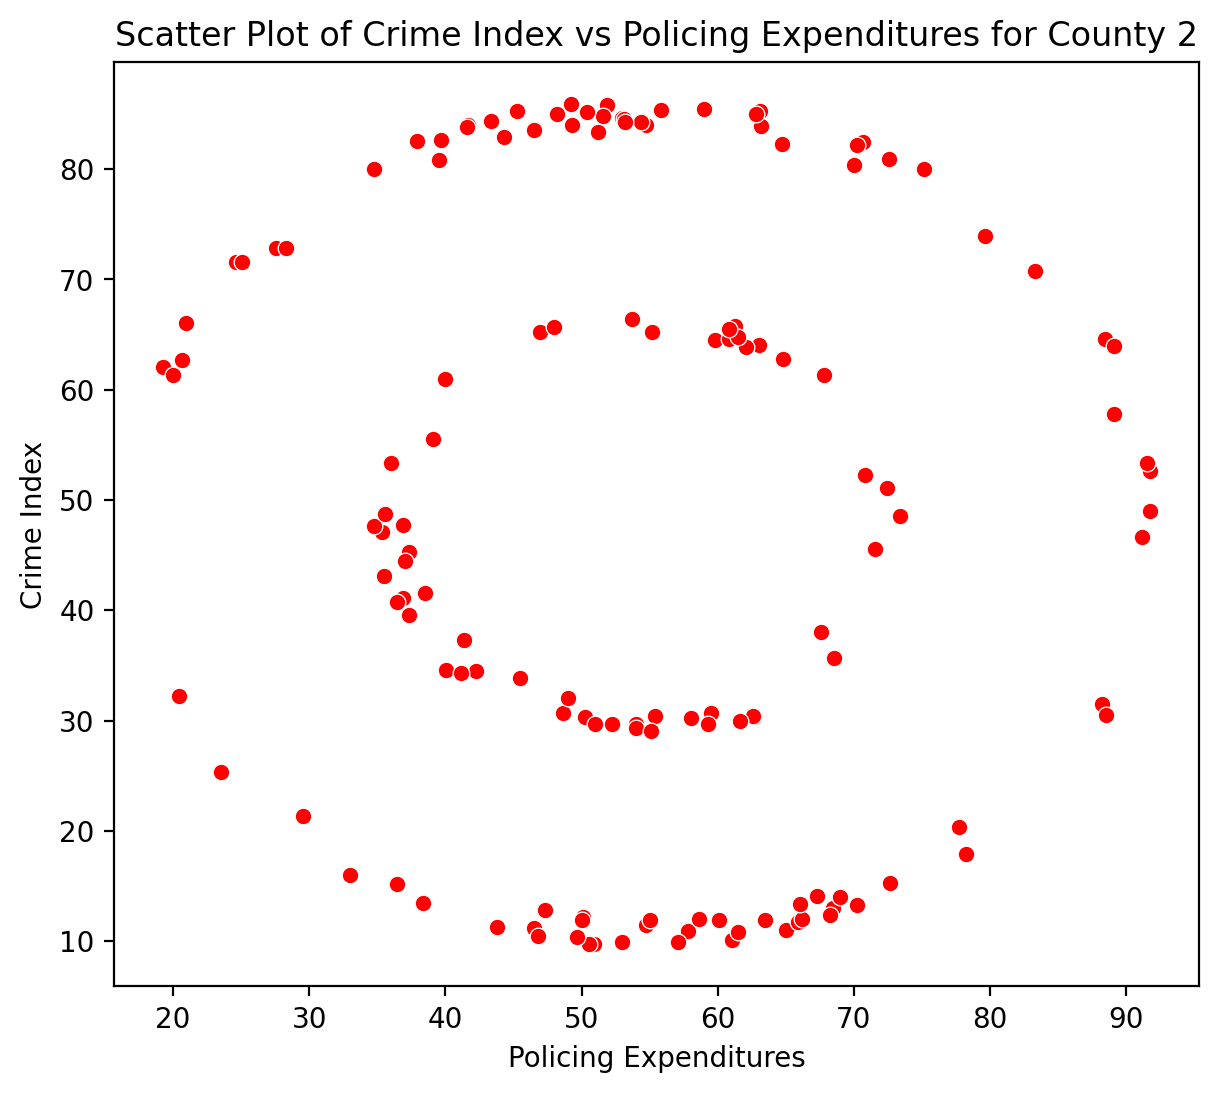

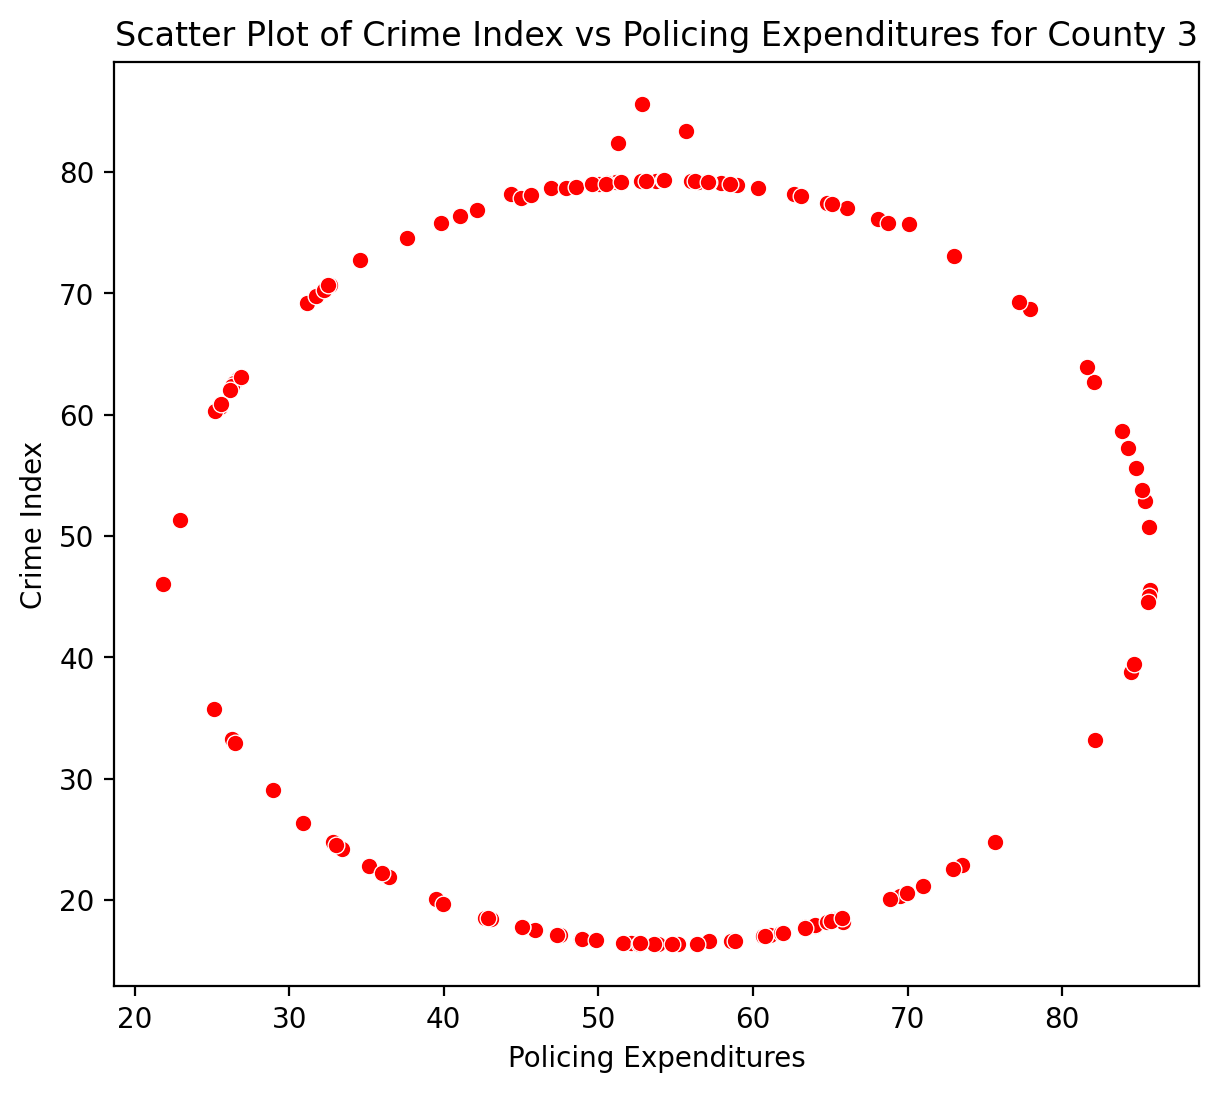

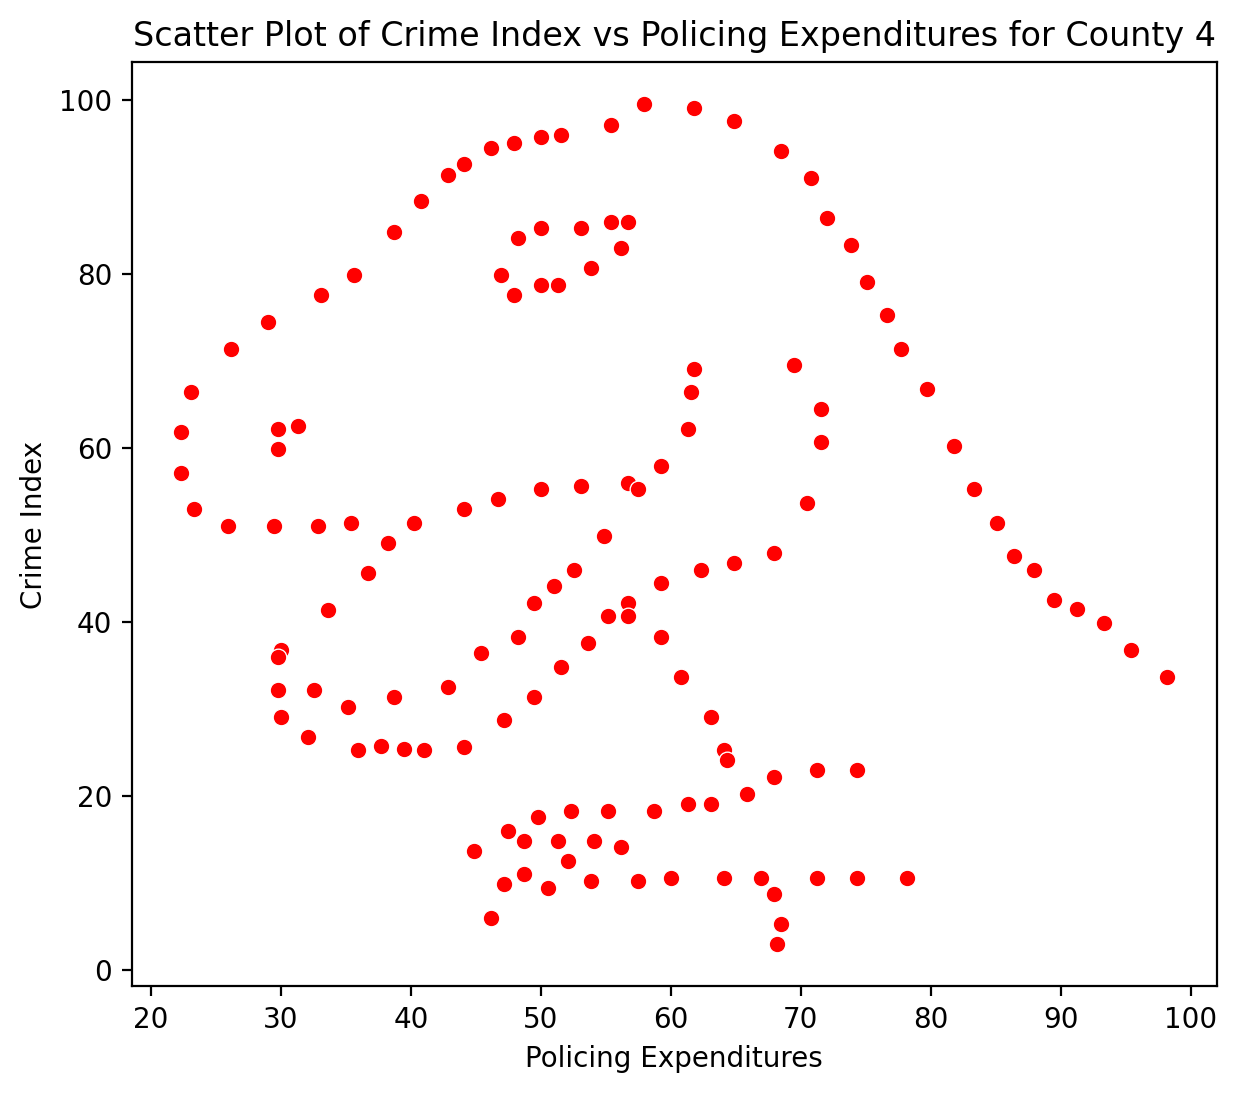

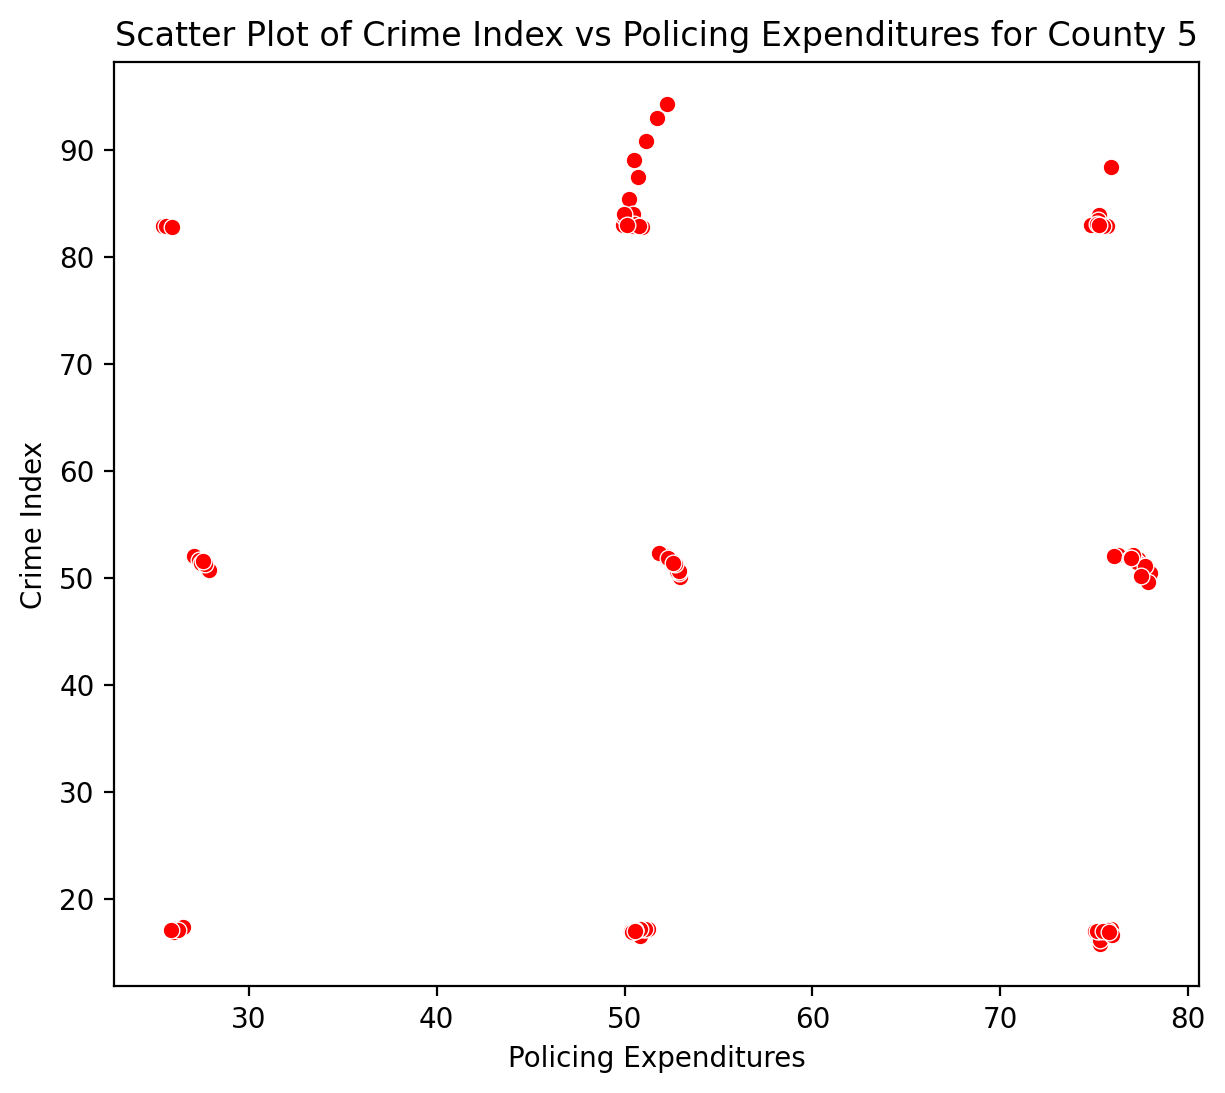

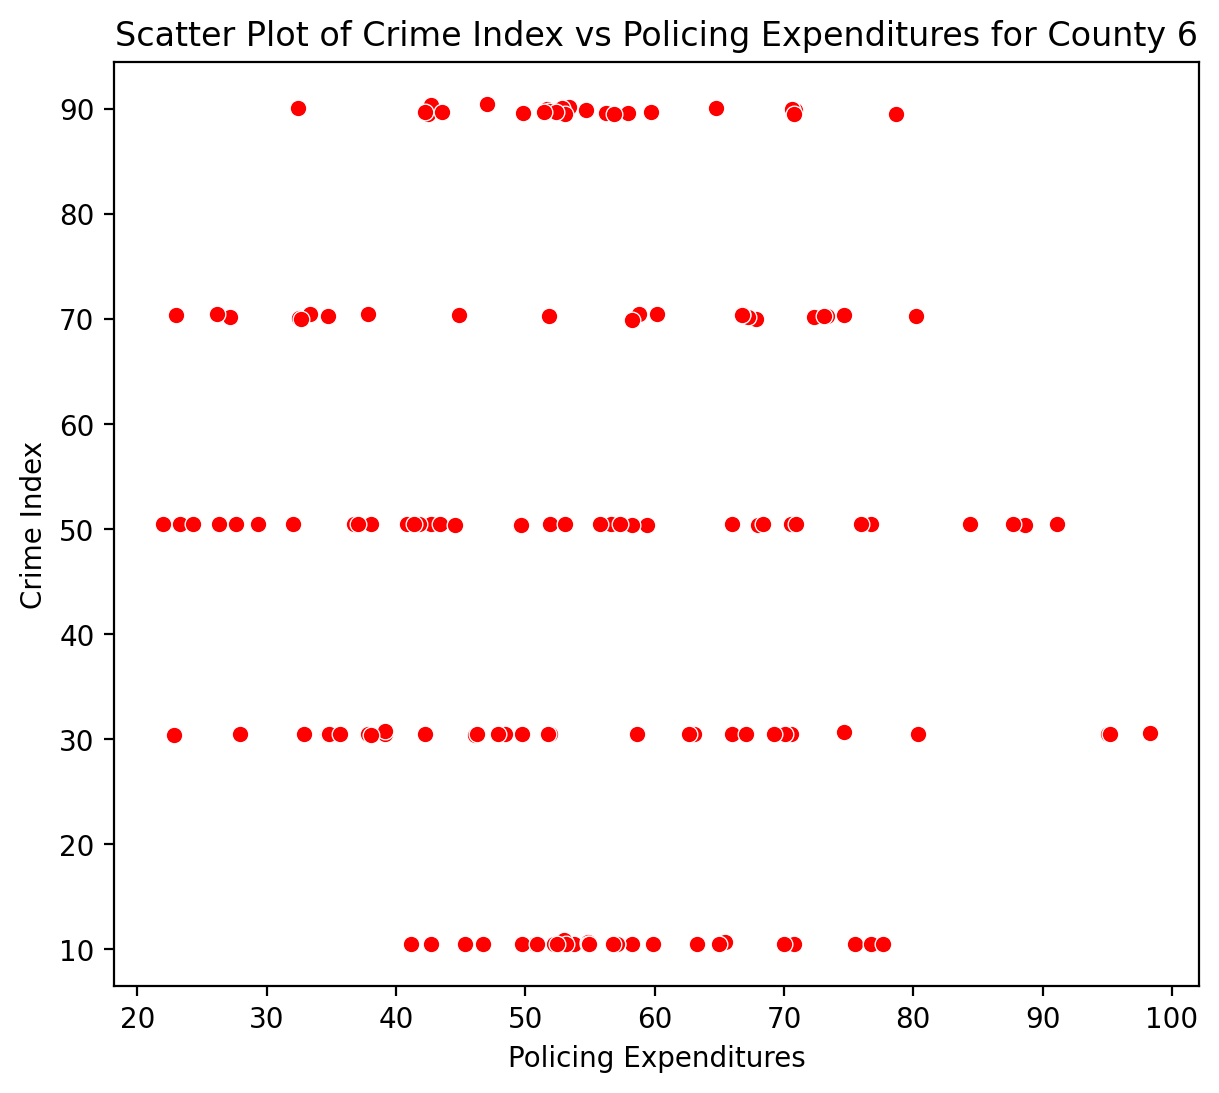

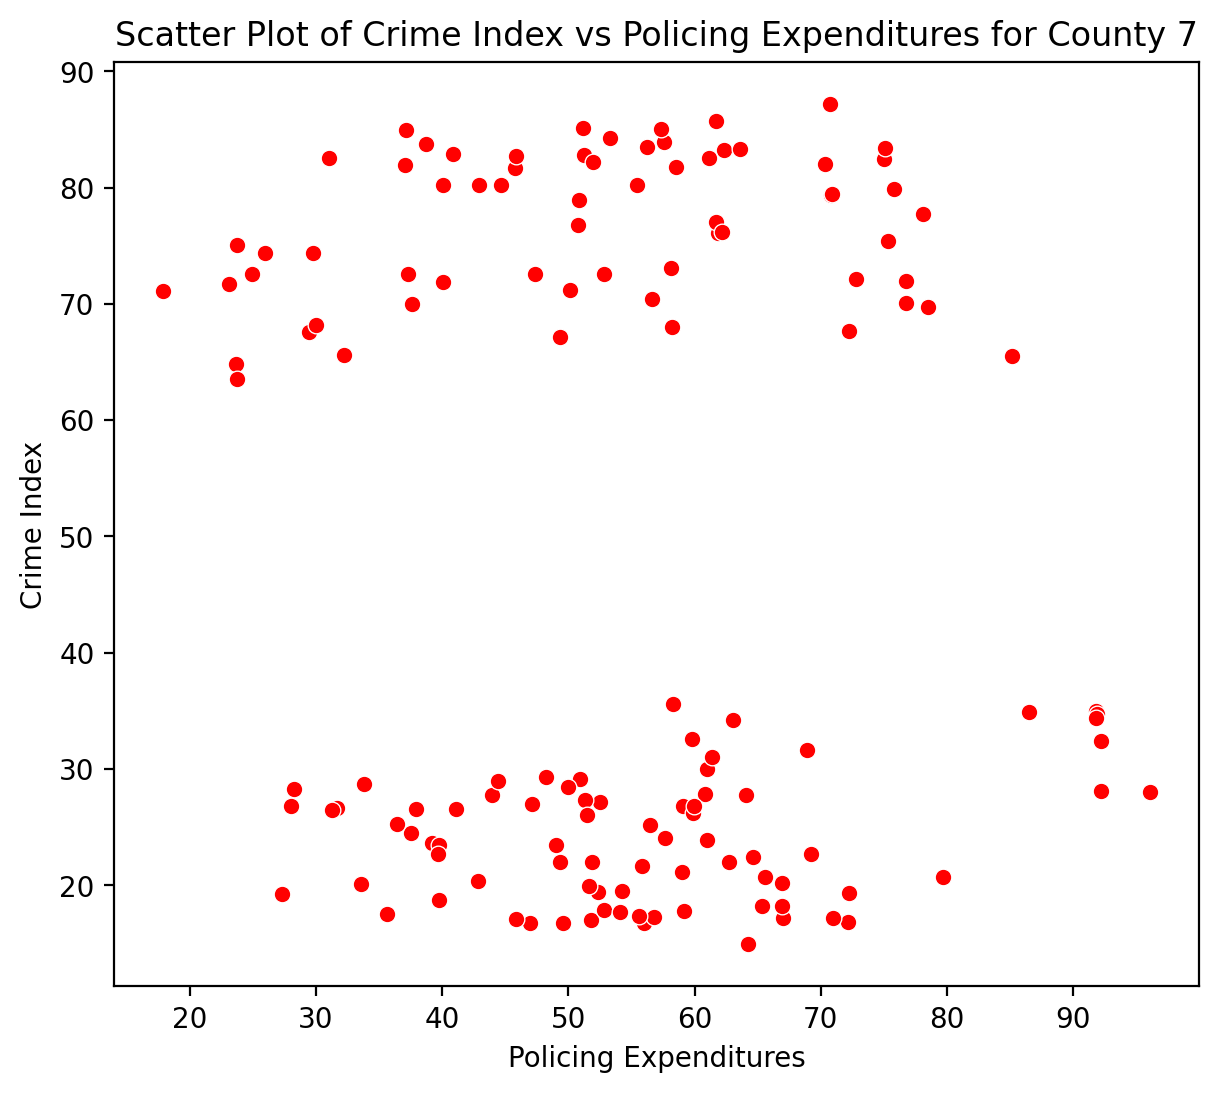

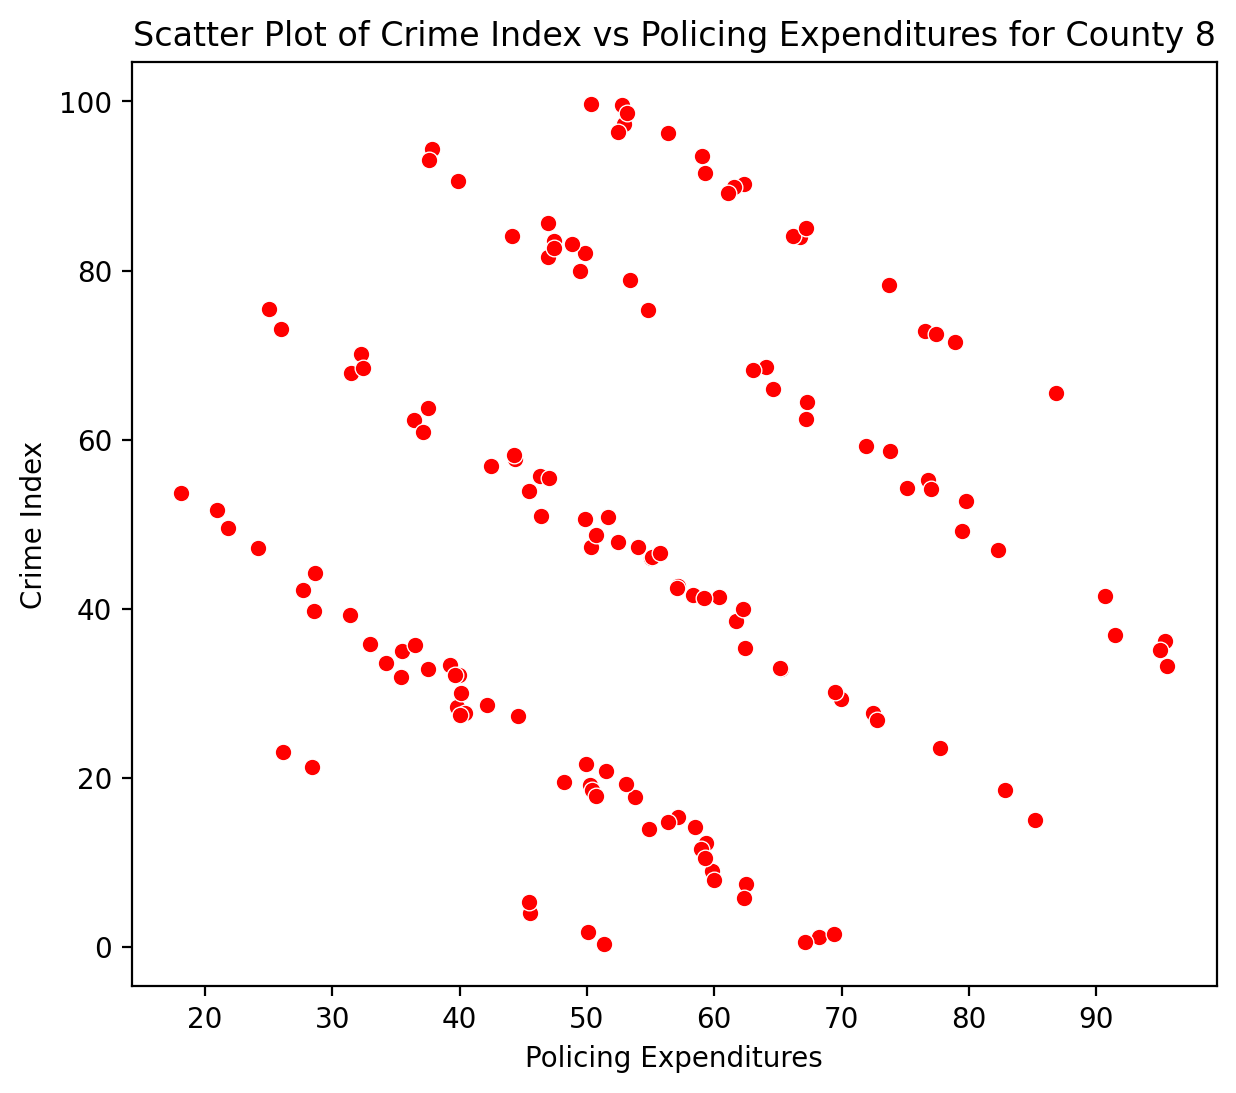

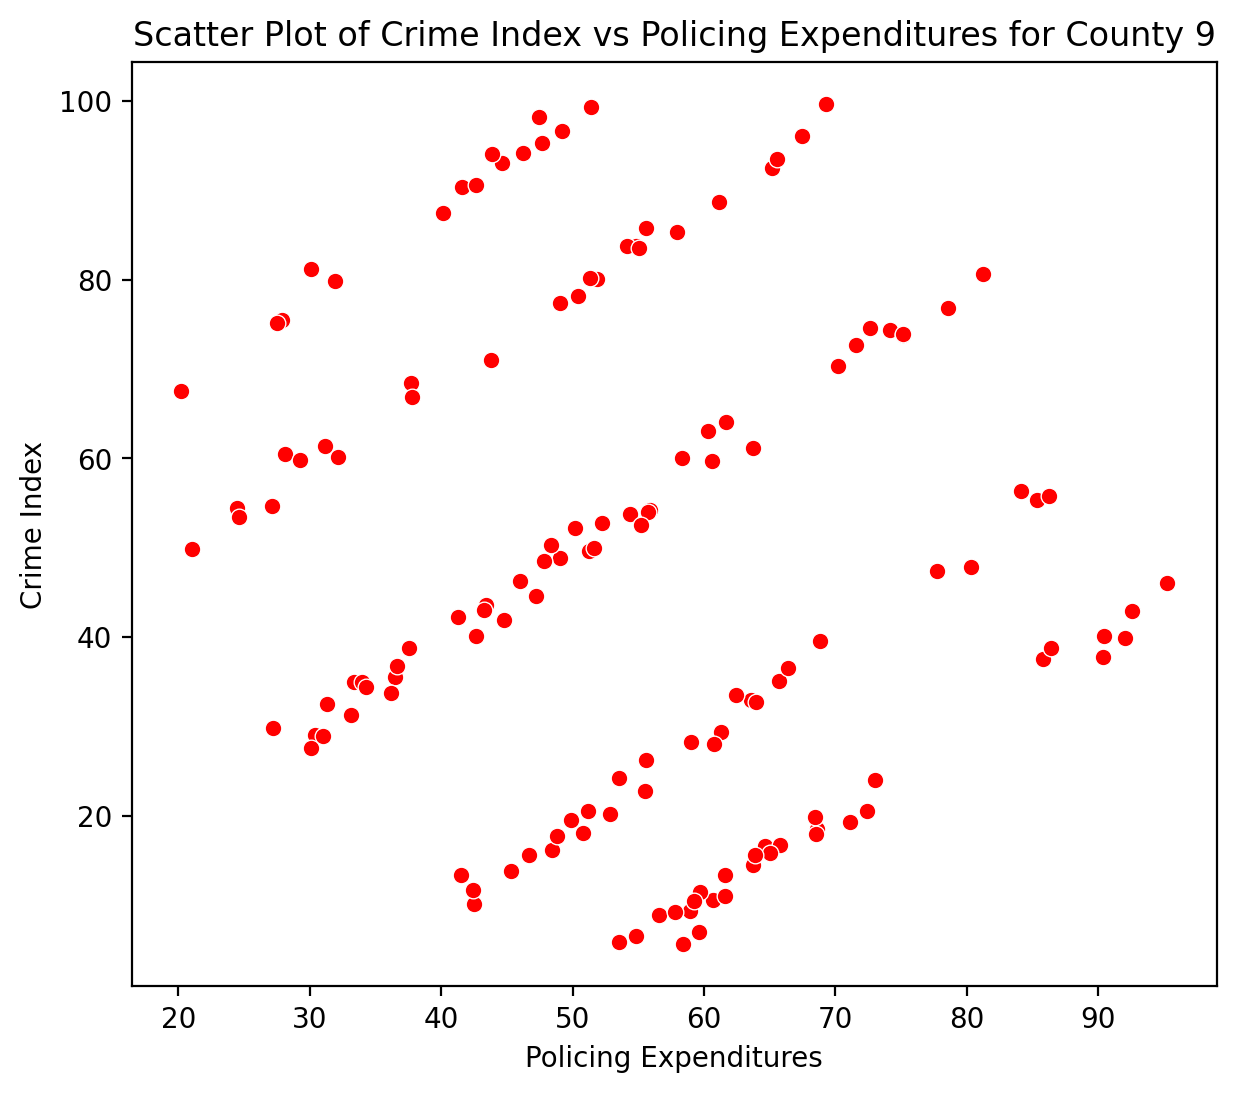

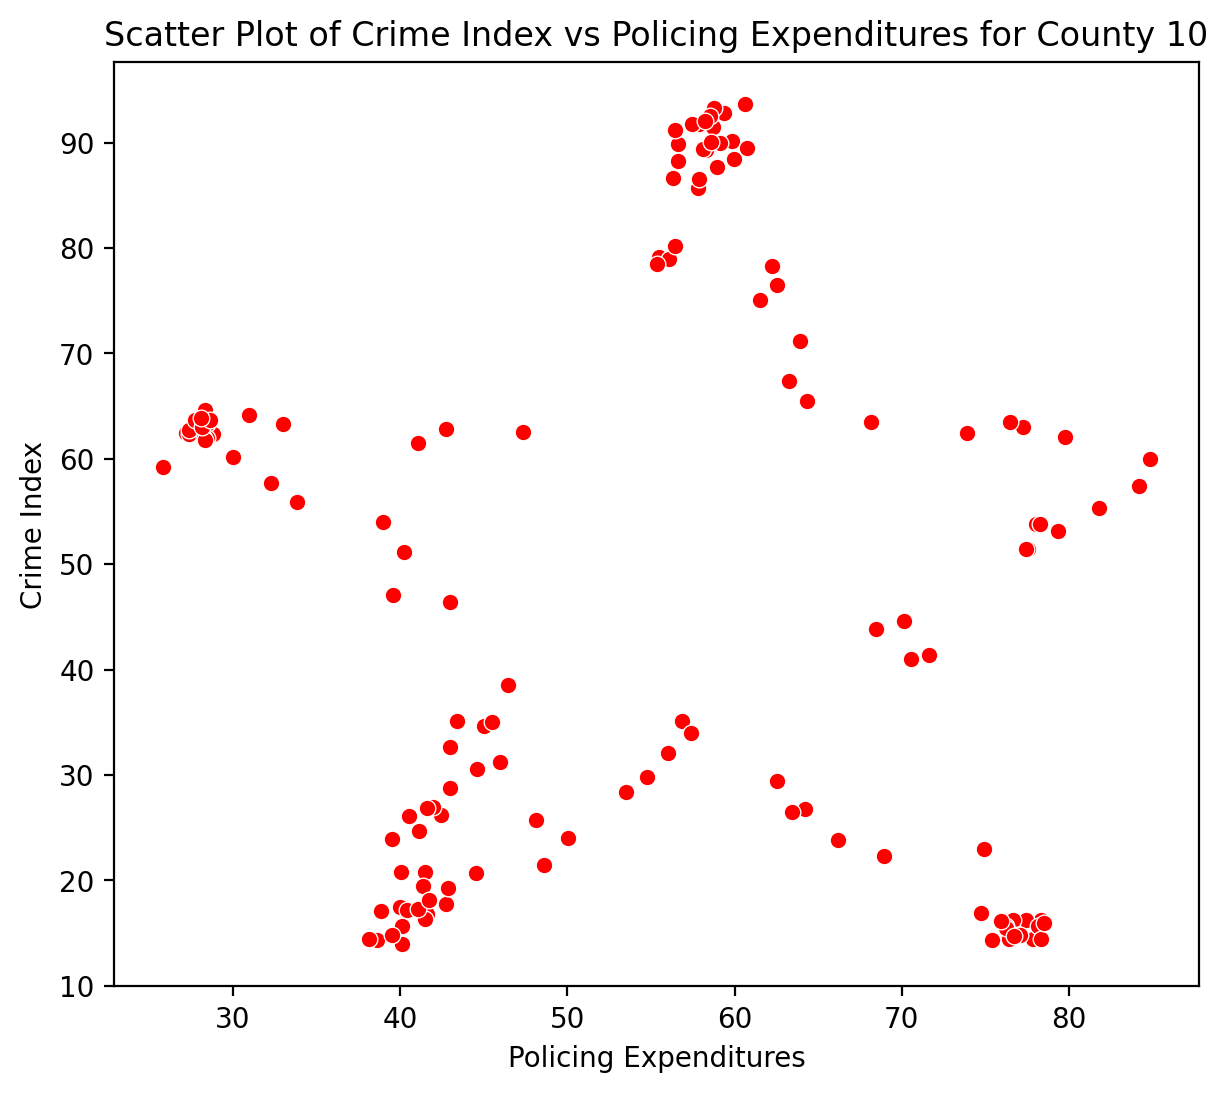

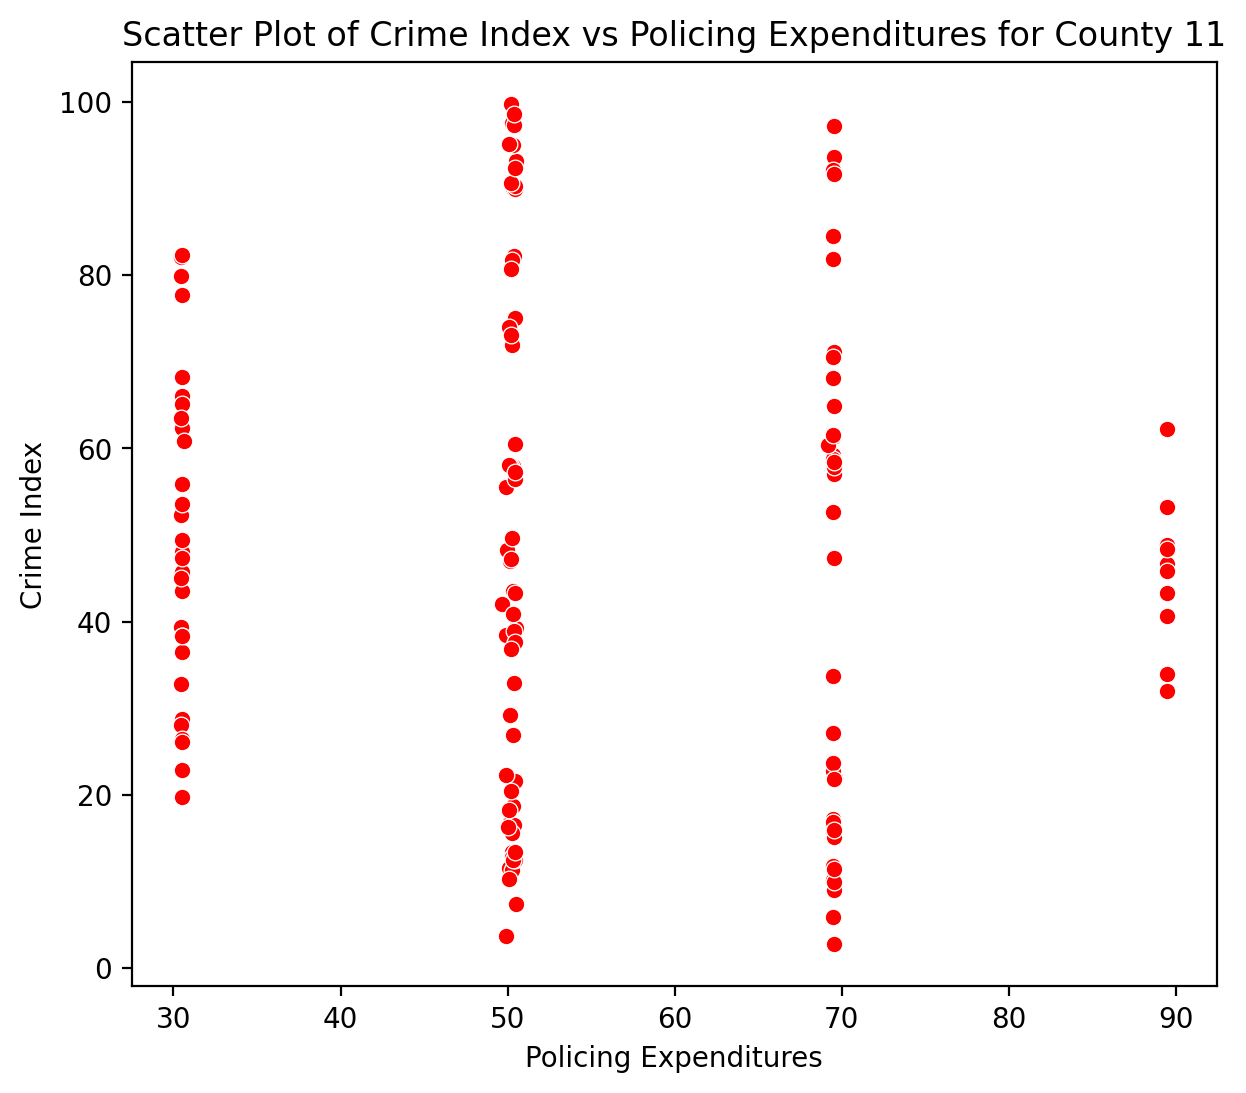

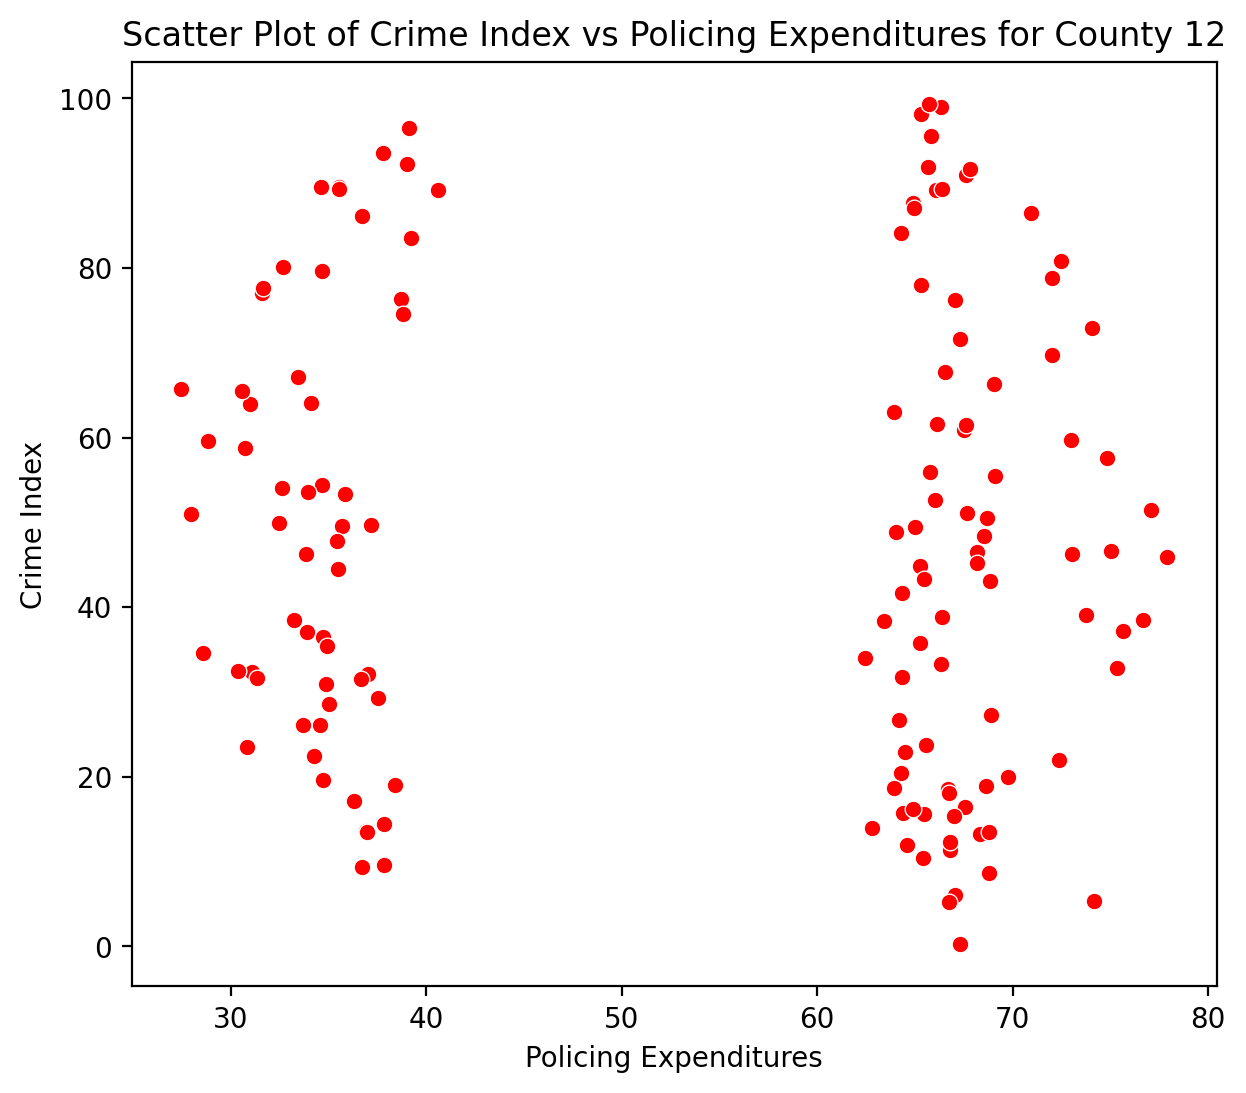

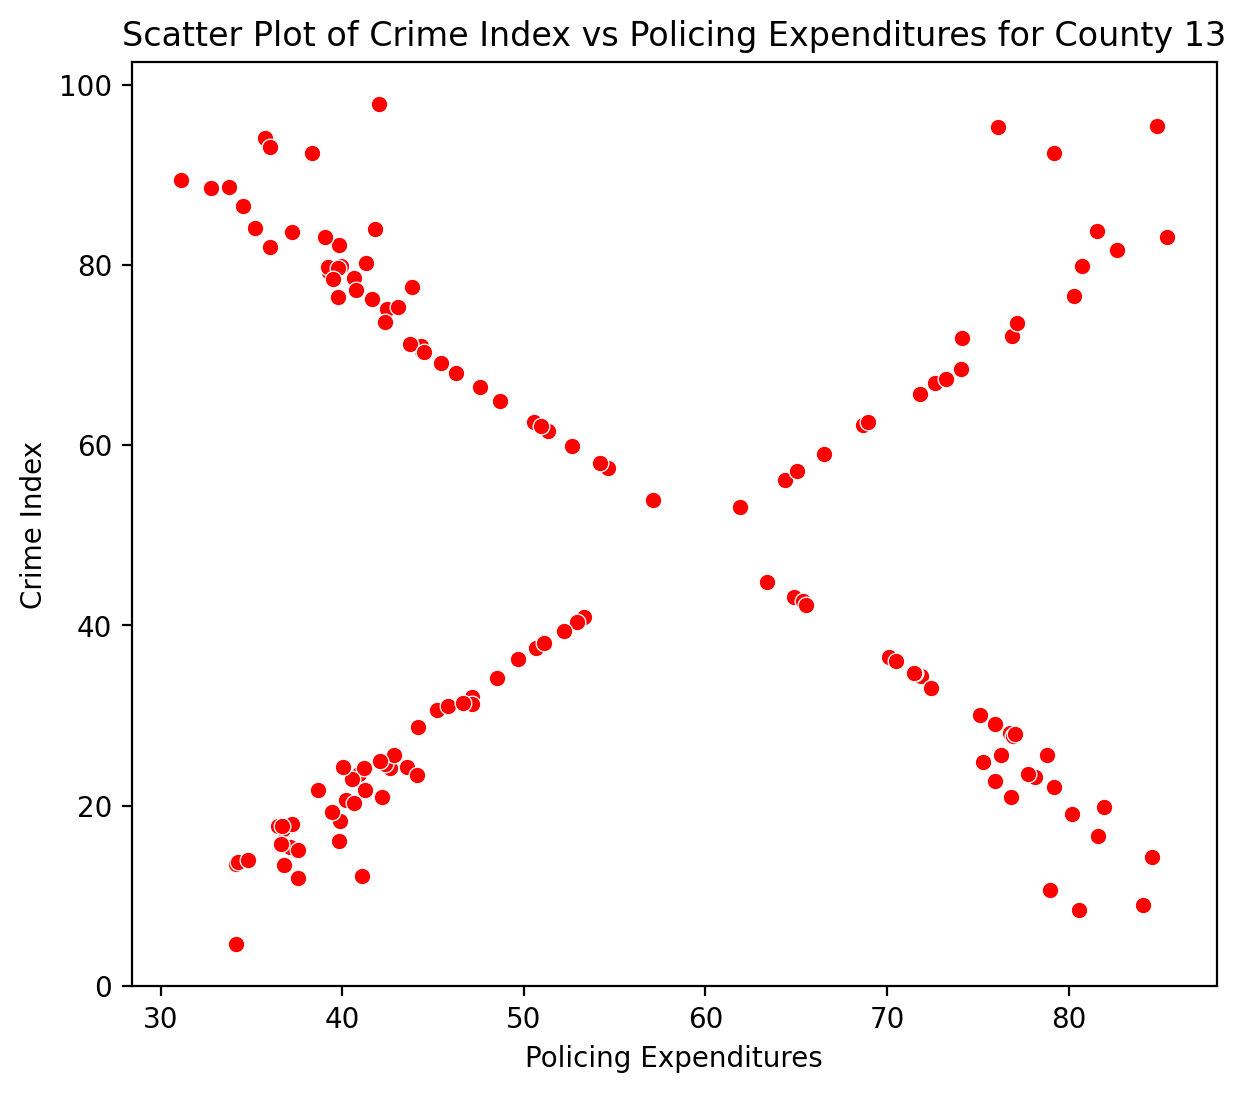

In [19]:
# loop through each county with a scatter plot
for county in range(1, 14):
    county_data = crime_expend_data[crime_expend_data["county_code"] == county]

    # scatter plot
    plt.figure(figsize=(7, 6))
    sns.scatterplot(
        data=county_data,
        x="policeexpenditures",
        y="crimeindex",
        color="red",
    )
    plt.title(
        f"Scatter Plot of Crime Index vs Policing Expenditures for County {county}"
    )
    plt.xlabel("Policing Expenditures")
    plt.ylabel("Crime Index")
    plt.show()